In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv("Preprocessed_Loan_Default.csv")
dataset

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months,Gender_Female,Gender_Male,Employment_Status_Employed,Employment_Status_Unemployed,Location_Suburban,Location_Urban,Loan_Status_Non-Default
0,56,91910.323246,615,0.462601,3580.203540,27160.609602,11.562543,27,0,1,1,0,0,1,1
1,46,81880.547904,702,0.637618,38762.098480,22931.663587,5.241453,54,0,1,0,0,0,1,1
2,32,89696.082903,747,0.431507,8412.342168,6787.299376,6.928529,55,0,0,0,1,1,0,1
3,60,37123.175342,846,0.421620,2051.077370,29646.934665,14.422941,17,0,1,0,0,1,0,1
4,25,67655.479665,425,0.431039,29518.957965,11137.769677,10.970186,21,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,94318.593216,359,0.458550,32652.095340,13581.669336,15.286204,58,0,1,1,0,0,0,1
9996,29,22480.468746,671,0.310884,30803.407227,28718.251112,6.409365,71,1,0,1,0,0,1,1
9997,18,88172.496665,441,0.282163,8665.007815,22755.220904,8.818762,51,0,1,1,0,0,1,0
9998,25,51788.871823,417,0.370681,36921.116660,29066.184090,14.516478,50,0,0,1,0,0,0,1


In [3]:
quan=[]
qual=[]
for columnName in dataset.columns:
   # print("columnName")
    if(dataset[columnName].dtype=='O'):
        #print("qual")
        qual.append(columnName)
    else:
       # print("quan")
        quan.append(columnName)


In [4]:
quan

['Age',
 'Income',
 'Credit_Score',
 'Debt_to_Income_Ratio',
 'Existing_Loan_Balance',
 'Loan_Amount',
 'Interest_Rate',
 'Loan_Duration_Months',
 'Gender_Female',
 'Gender_Male',
 'Employment_Status_Employed',
 'Employment_Status_Unemployed',
 'Location_Suburban',
 'Location_Urban',
 'Loan_Status_Non-Default']

In [5]:
qual

[]

# UNIVARIATE

In [6]:
def Univariate(dataset,quan):
        descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max","kurtosis","skew","Var","Std"],columns=quan)
        for columnName in quan:
            descriptive[columnName]["Mean"]=dataset[columnName].mean()
            descriptive[columnName]["Median"]=dataset[columnName].median()
            descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
            descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
            descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
            descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
            descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
            descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
            descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
            descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
            descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Min"]=dataset[columnName].min()
            descriptive[columnName]["Max"]=dataset[columnName].max()
            descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
            descriptive[columnName]["skew"]=dataset[columnName].skew()
            descriptive[columnName]["Var"]=dataset[columnName].var()
            descriptive[columnName]["Std"]=dataset[columnName].std()
        return descriptive

In [7]:
Univariate(dataset,quan)

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months,Gender_Female,Gender_Male,Employment_Status_Employed,Employment_Status_Unemployed,Location_Suburban,Location_Urban,Loan_Status_Non-Default
Mean,41.054,60026.3,575.114,0.505075,24987.1,27420,11.5203,41.2514,0.4034,0.3971,0.5993,0.302,0.3318,0.3379,0.8033
Median,41,59841.8,578,0.504999,24815.3,27465.8,11.5726,41,0,0,1,0,0,0,1
Mode,43,150000,448,4.75389e-05,5.75546,5021.97,3.00389,27,0,0,1,0,0,0,1
Q1:25%,30,39846.9,443,0.256201,12390.9,16202.7,7.25237,26,0,0,0,0,0,0,1
Q2:50%,41,59841.8,578,0.504999,24815.3,27465.8,11.5726,41,0,0,1,0,0,0,1
Q3:75%,53,80025.3,709,0.758348,37840.5,38546.9,15.7055,56,1,1,1,1,1,1,1
99%,64,99280.1,844,0.9884,49534.3,49552.4,19.8392,71,1,1,1,1,1,1,1
Q4:100%,64,150000,849,0.999895,49983.8,49983.3,19.9985,71,1,1,1,1,1,1,1
IQR,23,40178.4,266,0.502147,25449.6,22344.2,8.45317,30,1,1,1,1,1,1,0
1.5rule,34.5,60267.6,399,0.753221,38174.3,33516.3,12.6798,45,1.5,1.5,1.5,1.5,1.5,1.5,0


In [8]:
dataset['Loan_Status_Non-Default'].skew()

-1.5262528724461275

In [9]:
dataset['Loan_Status_Non-Default'].kurtosis()

0.32951369338604897

C:\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


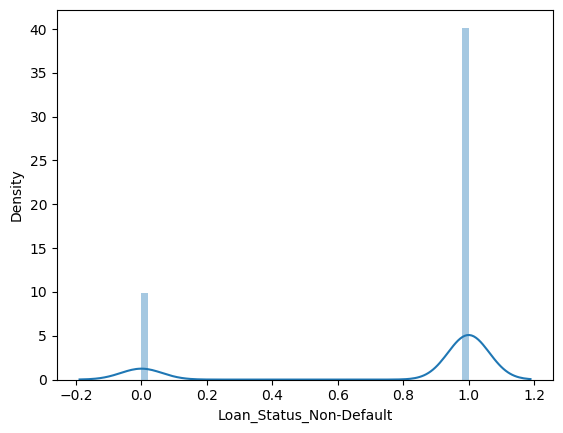

In [10]:
sns.distplot(dataset['Loan_Status_Non-Default'])

# BIVARIATE

In [11]:
dataset.cov()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months,Gender_Female,Gender_Male,Employment_Status_Employed,Employment_Status_Unemployed,Location_Suburban,Location_Urban,Loan_Status_Non-Default
Age,181.821066,3.031366e+02,-23.676829,-0.044483,1.601288e+02,-1.832815e+03,0.639161,0.509875,-0.013785,-0.014845,-0.068969,0.036796,-0.108028,0.042458,-0.041382
Income,303.136594,5.440615e+08,-66967.767764,-103.606655,-2.599702e+06,9.029549e+05,1927.607224,-1336.243196,137.451914,-100.316543,33.880916,28.423747,-14.541960,-47.695600,128.608373
Credit_Score,-23.676829,-6.696777e+04,24597.684050,-0.921328,2.336107e+04,-1.941298e+04,-10.286203,-16.840369,-0.973525,1.265817,-0.478628,1.329575,0.665008,-0.279082,0.905134
Debt_to_Income_Ratio,-0.044483,-1.036067e+02,-0.921328,0.083197,-6.559962e+01,-6.843606e+01,-0.003064,0.038021,-0.002245,0.000098,-0.001443,0.001170,0.001744,-0.002042,-0.000012
Existing_Loan_Balance,160.128800,-2.599702e+06,23361.070156,-65.599616,2.118014e+08,-7.266817e+05,333.739649,32.897852,-79.368367,77.273718,200.002209,-154.993065,57.681138,-42.050683,7.354673
Loan_Amount,-1832.814617,9.029549e+05,-19412.982609,-68.436060,-7.266817e+05,1.671624e+08,135.957449,1881.092292,75.470293,-20.988010,-61.854743,88.617256,27.310347,-109.769736,-5.774745
Interest_Rate,0.639161,1.927607e+03,-10.286203,-0.003064,3.337396e+02,1.359574e+02,24.056353,-0.010689,-0.042717,0.018124,-0.013765,0.009593,-0.002619,0.017917,0.055898
Loan_Duration_Months,0.509875,-1.336243e+03,-16.840369,0.038021,3.289785e+01,1.881092e+03,-0.010689,299.606759,0.012586,-0.057637,-0.074071,0.061283,-0.045719,0.029155,-0.003650
Gender_Female,-0.013785,1.374519e+02,-0.973525,-0.002245,-7.936837e+01,7.547029e+01,-0.042717,0.012586,0.240693,-0.160206,0.004243,-0.002527,-0.001048,0.000291,-0.001251
Gender_Male,-0.014845,-1.003165e+02,1.265817,0.000098,7.727372e+01,-2.098801e+01,0.018124,-0.057637,-0.160206,0.239436,-0.003582,0.003876,0.002642,-0.000780,-0.000390


In [12]:
dataset.corr()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months,Gender_Female,Gender_Male,Employment_Status_Employed,Employment_Status_Unemployed,Location_Suburban,Location_Urban,Loan_Status_Non-Default
Age,1.000000,0.000964,-0.011196,-0.011437,0.000816,-0.010513,0.009664,0.002185,-0.002084,-0.002250,-0.010437,0.005943,-0.017014,0.006657,-0.007720
Income,0.000964,1.000000,-0.018306,-0.015400,-0.007658,0.002994,0.016849,-0.003310,0.012011,-0.008789,0.002964,0.002654,-0.001324,-0.004323,0.013870
Credit_Score,-0.011196,-0.018306,1.000000,-0.020366,0.010235,-0.009574,-0.013372,-0.006203,-0.012652,0.016494,-0.006227,0.018463,0.009005,-0.003762,0.014518
Debt_to_Income_Ratio,-0.011437,-0.015400,-0.020366,1.000000,-0.015627,-0.018351,-0.002166,0.007615,-0.015866,0.000692,-0.010209,0.008832,0.012842,-0.014969,-0.000102
Existing_Loan_Balance,0.000816,-0.007658,0.010235,-0.015627,1.000000,-0.003862,0.004676,0.000131,-0.011116,0.010851,0.028043,-0.023195,0.008417,-0.006108,0.001271
Loan_Amount,-0.010513,0.002994,-0.009574,-0.018351,-0.003862,1.000000,0.002144,0.008406,0.011898,-0.003317,-0.009762,0.014928,0.004486,-0.017949,-0.001124
Interest_Rate,0.009664,0.016849,-0.013372,-0.002166,0.004676,0.002144,1.000000,-0.000126,-0.017753,0.007552,-0.005727,0.004260,-0.001134,0.007723,0.028669
Loan_Duration_Months,0.002185,-0.003310,-0.006203,0.007615,0.000131,0.008406,-0.000126,1.000000,0.001482,-0.006805,-0.008732,0.007711,-0.005609,0.003561,-0.000530
Gender_Female,-0.002084,0.012011,-0.012652,-0.015866,-0.011116,0.011898,-0.017753,0.001482,1.000000,-0.667350,0.017647,-0.011218,-0.004537,0.001255,-0.006416
Gender_Male,-0.002250,-0.008789,0.016494,0.000692,0.010851,-0.003317,0.007552,-0.006805,-0.667350,1.000000,-0.014939,0.017253,0.011468,-0.003371,-0.002007


In [13]:
import matplotlib.pyplot as plt

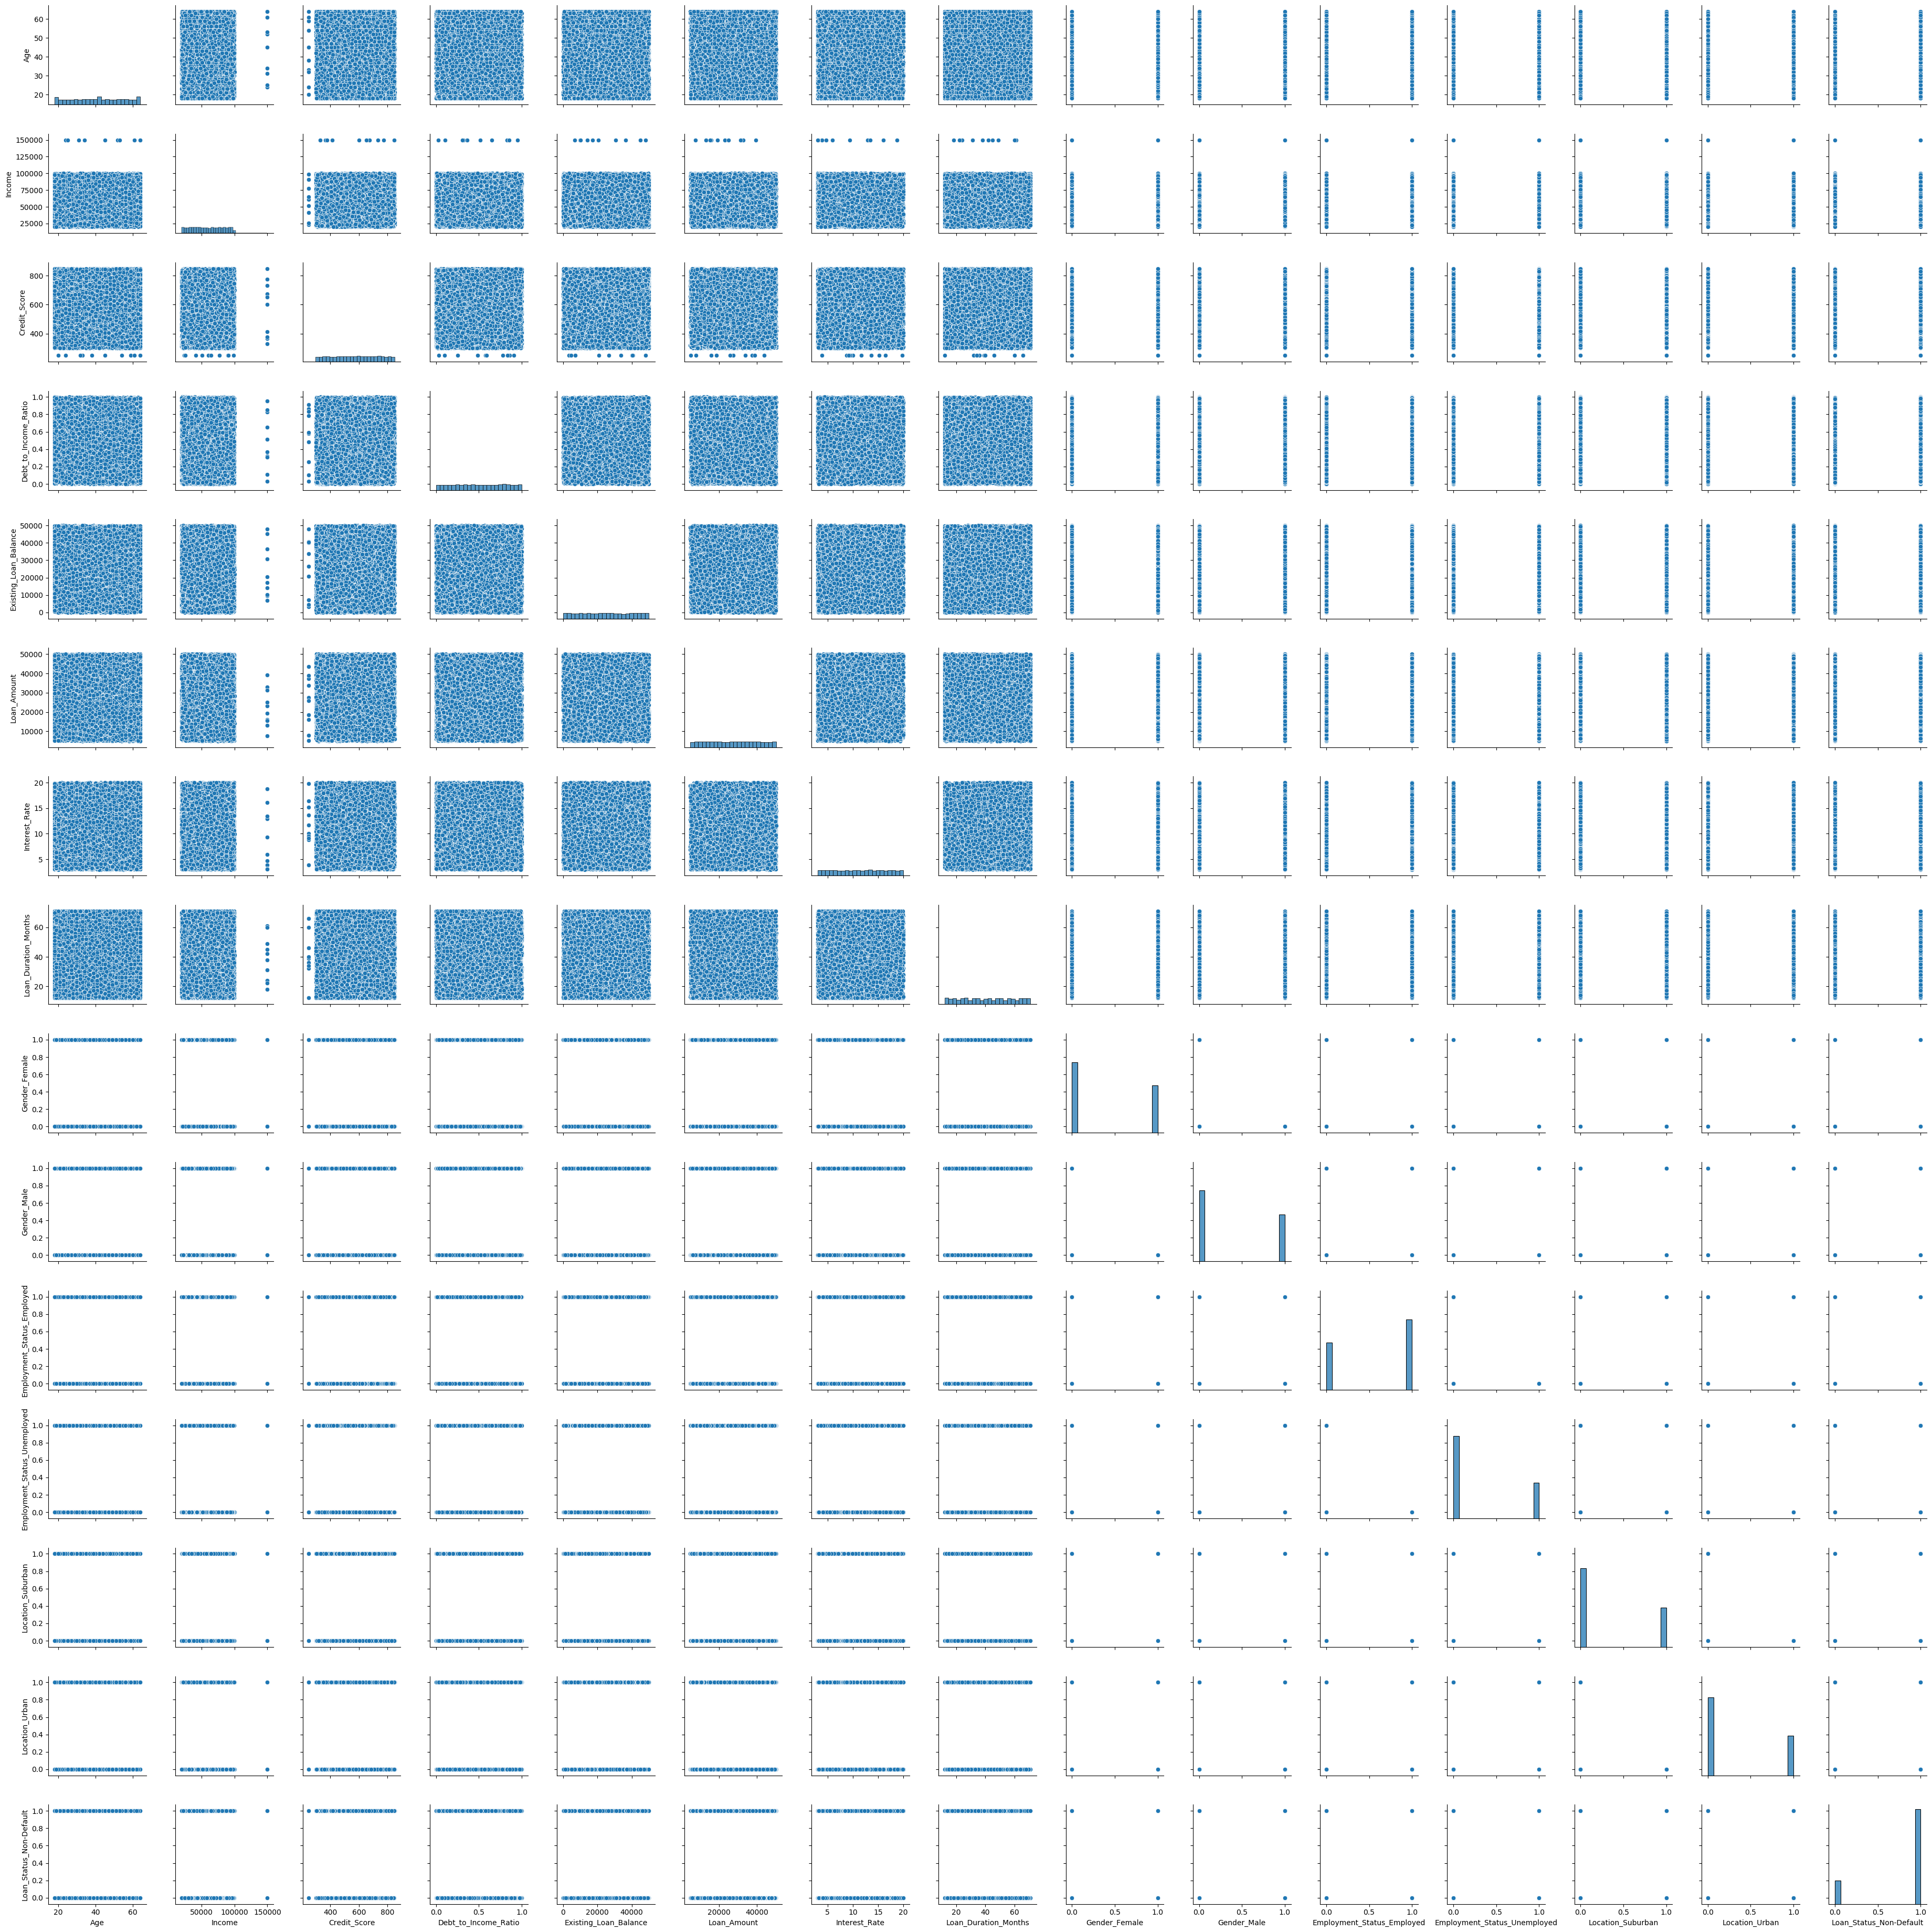

In [14]:
sns.pairplot(dataset)

In [15]:
x=dataset[['Age',
 'Income',
 'Credit_Score',
 'Debt_to_Income_Ratio',
 'Existing_Loan_Balance',
 'Loan_Amount',
 'Interest_Rate',
 'Loan_Duration_Months',
 'Gender_Female',
 'Gender_Male',
 'Employment_Status_Employed',
 'Employment_Status_Unemployed',
 'Location_Suburban',
 'Location_Urban',
 'Loan_Status_Non-Default']].corr()

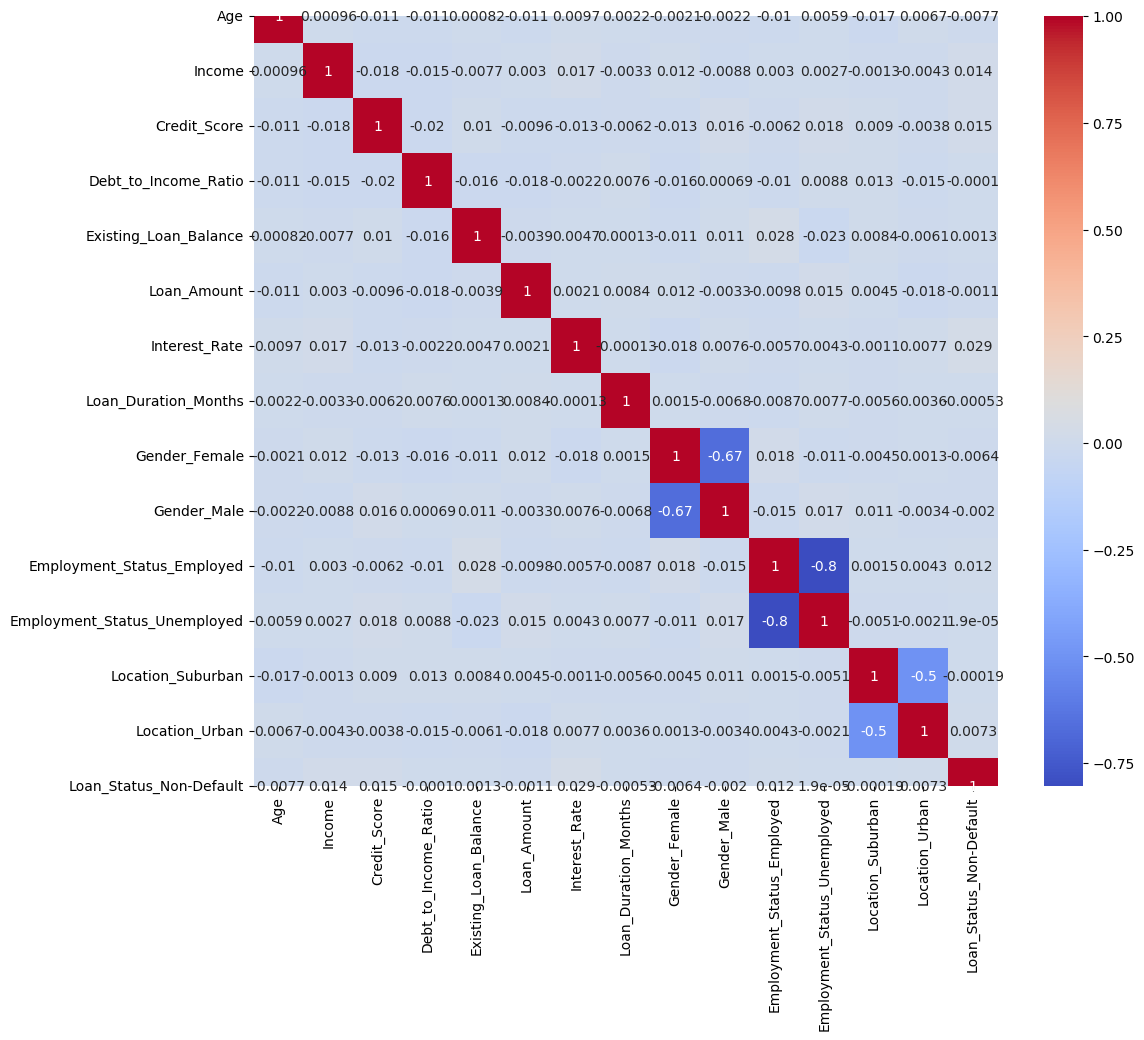

In [16]:
fig = plt.subplots(figsize=(12, 10))
sns.heatmap(x, annot=True, cmap="coolwarm")
plt.show()